In [1]:
import numpy as np
from collections import Counter

In [96]:
class KNN:
    def __init__(self, k=5):
        self.k = k
        
    def euclidian_distance(self, x1, x2):
        distance = np.sqrt(np.sum(np.power((x1 - x2), 2)))
        return distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [self.euclidian_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_commom = Counter(k_nearest_labels).most_common()
        return most_commom[0][0]

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [106]:
iris_db = datasets.load_iris()

X, y = iris_db.data, iris_db.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

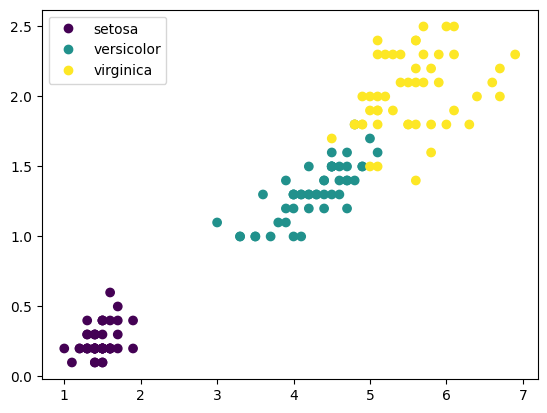

In [120]:
plt.figure()
sctr = plt.scatter(X[:,2], X[:,3], c=y)
plt.legend(sctr.legend_elements()[0], iris_db['target_names'])
plt.show()

In [108]:
clf = KNN()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(f'{predictions = }')

predictions = [0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1]


In [158]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

